In [338]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [339]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [340]:
x, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=[0.75,0.5, 1], random_state=42)

In [341]:
def plot_blobs(x, y, ax, cmap='viridis'):
    labels = np.unique(y)
    cmap_ = plt.get_cmap(cmap, lut=len(labels))
    for label in labels:
        sub_idx = np.argwhere(y == label).ravel()
        sub_x = x[sub_idx]
        sub_y = y[sub_idx]
        ax.scatter(sub_x[:,0], sub_x[:,1], color=cmap_(label), label=label)

In [342]:
from kmeans import KMeans

In [343]:
model = KMeans(n_clusters=3)

In [344]:
model.train_data = x

In [345]:
centers = model.initialize_centers()

In [346]:
_ = model.optimize(n_iterations=10000, lr=0.01)

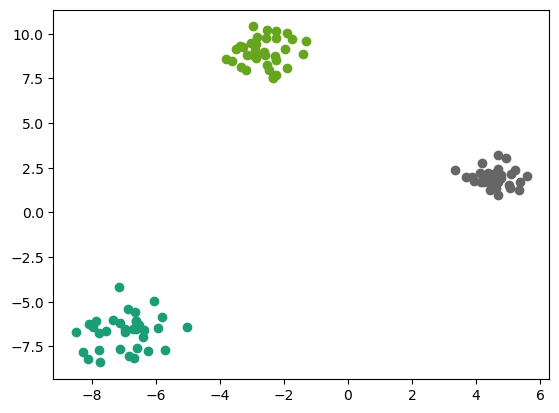

In [347]:
pred = model.get_labels()
plot_blobs(x, pred, ax=plt.gca(), cmap='Dark2')
plot_blobs(model.centers, np.arange(0,len(model.centers)), ax=plt.gca(), cmap='Dark2')